## Preparations

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

os.chdir("..")
from data_cleaning import prepare_data
from plotting import MessengerReport
from aesthetics import set_colors

In [2]:
# Set folder name - name of the folder where message files are saved
folder = "balkani_barcelona"

## Data cleaning

In [3]:
df = prepare_data(f"data/{folder}/", exclude_members=["Radványi Balázs", "Samu Varga"])

/Users/matevaradi/Repos/messenger-stats/data_cleaning.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["content"] = df.content.fillna("")


In [4]:
df.head()

,sender_name,content,date_time,year,hour,weekday,month,reaction_Kozma Gergő,reaction_Tamás Kökény,reaction_Bence Magyar,...,reaction_Samu Varga,reaction_Loósz Lőrinc,reaction_Tamás Kolmann,reaction_Karim Chorfi,reaction_Radványi Balázs,reaction_Mate Varadi,reaction_Doma Erőss,reaction_Péntek Balázs,reaction_Botond Varga,reaction_Boti Eross
0,Botond Varga,be kell meg potolni,2022-04-24 22:19:16.037,2022,22,6,202204,,❤,,...,,,,,,,,,,👍
1,Botond Varga,ja amugy azt,2022-04-24 22:19:12.607,2022,22,6,202204,,,,...,,,,,,,,,,
2,Boti Eross,ott mit mentünk volna,2022-04-24 22:19:05.444,2022,22,6,202204,👍,,,...,,,,,,,,,,
3,Boti Eross,fu de kár h elmaradt barcelona,2022-04-24 22:18:59.288,2022,22,6,202204,,,,...,,,,,,,,,,
4,Kozma Gergő,nekik foldvaron van b haz ami ures,2022-04-23 20:39:00.662,2022,20,5,202204,,,,...,,,,,,,,,,


In [5]:
# Save data
df.to_csv(f"data/{folder}/{folder}.csv", index=False)

## Analysis

In [6]:
members = sorted(df.sender_name.unique().tolist())
color_dict = set_colors(members)
mr = MessengerReport(data=df, 
                     color_dict=color_dict,
                     folder_name=folder)

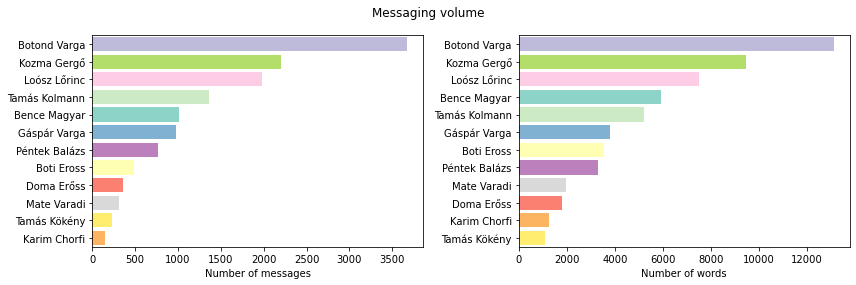

In [7]:
mr.plot_message_volume()

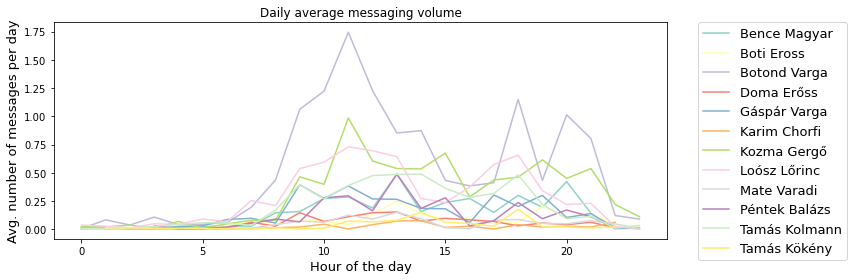

In [8]:
mr.plot_daily_use()

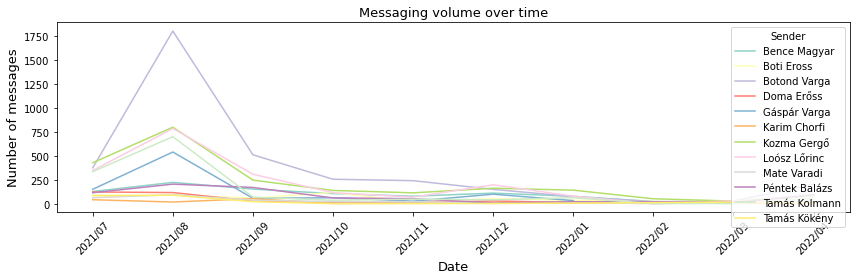

In [9]:
mr.plot_historic_use()

In [10]:
mr.sample_messages_with_emoji("❤", threshold=4)

@tamás kökény
  sent by Kozma Gergő, received ❤❤❤❤❤❤❤❤


életem legparábbja volt, soha nem buliztam meg ilyen jo brigaddal
  sent by Loósz Lőrinc, received ❤❤❤❤❤❤❤❤❤❤


legjobb nyar volt, koszi nektek!
  sent by Mate Varadi, received ❤❤❤❤❤❤❤❤❤❤


azt beszeltuk hogy nyomhatnank egy szigligetet
  sent by Doma Erőss, received ❤❤❤❤👍


fuhh de kivittuk ezt a balkani barcelonat gyerekek
  sent by Doma Erőss, received ❤❤❤❤👍


mintha kicsereltek volna az agyamat
  sent by Doma Erőss, received ❤👍❤👍❤❤


boti neked kulon orok hala, gondoltam hogy privatban ezt megbeszeljuk, de igazabol szerintem jo ha tudja mindenki a te szerepvallalasodat.
hajnaltol ma delutanig konkretan arra szantad minden perced, hogy nekem segits, segitettel intezni a mentot, folyamatosan kapcsolatban voltal viraggal, atjottetek
villovel nyugtatni ot, hivtad a korhazat es erdeklodtel az allapotomrol, elmentel a kopenyedert es az autodert hogy be tudj jonni
hozzam es haza tudj hozni, es meg ki tudja mi minden volt amit nem tu

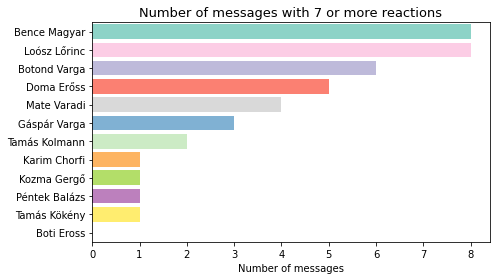

In [11]:
mr.plot_emoji_received("😆", threshold=7)

/Users/matevaradi/Repos/messenger-stats/plotting.py:396: UserWarning: Glyph 108 (l) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:396: UserWarning: Glyph 112 (p) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:396: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.
  fig.savefig(f"results/{self.folder_name}/reactions.png", dpi=300)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/py

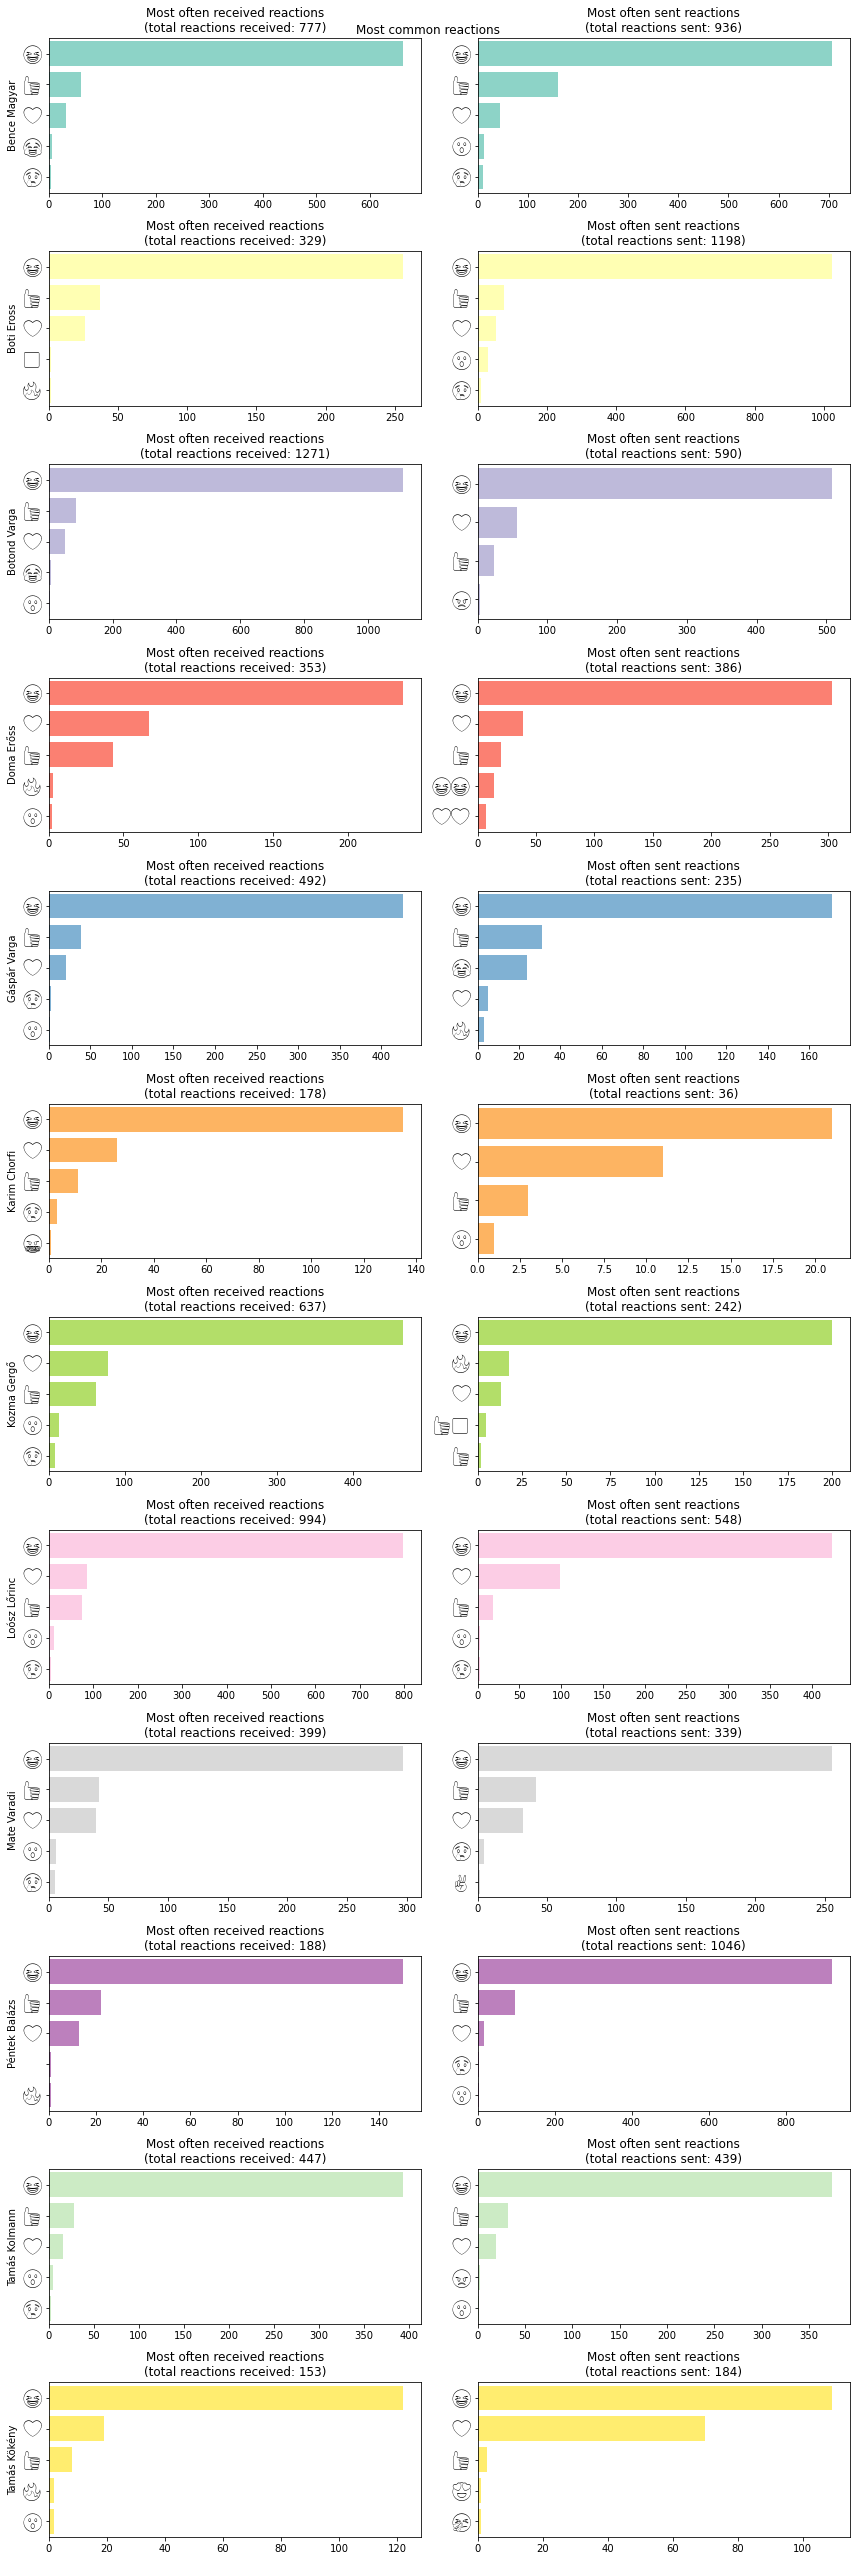

In [12]:
mr.plot_reactions()

/Users/matevaradi/Repos/messenger-stats/plotting.py:465: UserWarning: Glyph 108 (l) missing from current font.
  fig.savefig(f"results/{self.folder_name}/network_of_{emoji}", dpi=300)
/Users/matevaradi/Repos/messenger-stats/plotting.py:465: UserWarning: Glyph 112 (p) missing from current font.
  fig.savefig(f"results/{self.folder_name}/network_of_{emoji}", dpi=300)


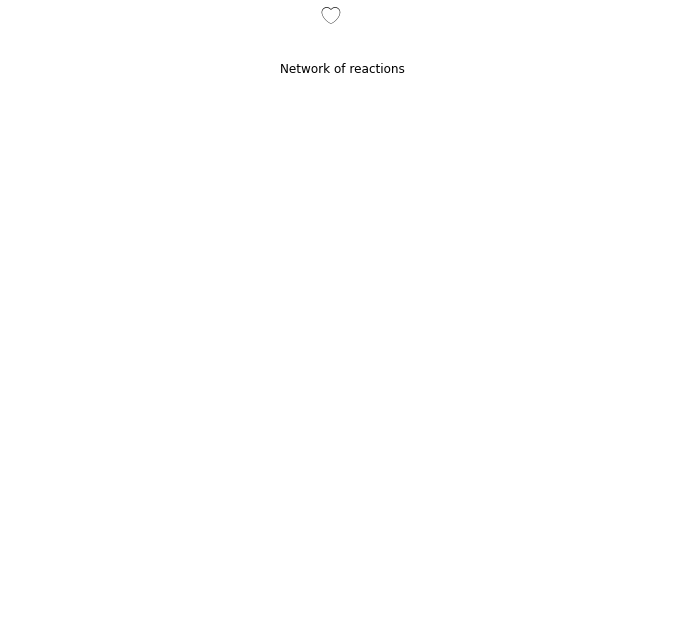

In [13]:
mr.plot_reaction_network("❤️")

/Users/matevaradi/Repos/messenger-stats/plotting.py:474: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:474: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:474: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:474: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
/Users/matevaradi/Repos/messenger-stats/plotting.py:530: UserWarning: Glyph 108 (l) missing from current font.
  report_pdf.savefig(plot, bbox_inches="tight", pad_inches=0.2)
/Users/matevaradi/Repos/messenger-stats/plotting.py:530: UserWarning: Glyph 112 (p) missing from current font.
  report_pdf.savefig(plot, bbox_inches="tight", pad_inches=0.2)
/Users/matevaradi/Repos/messenger-stats/plotting.py:530: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.

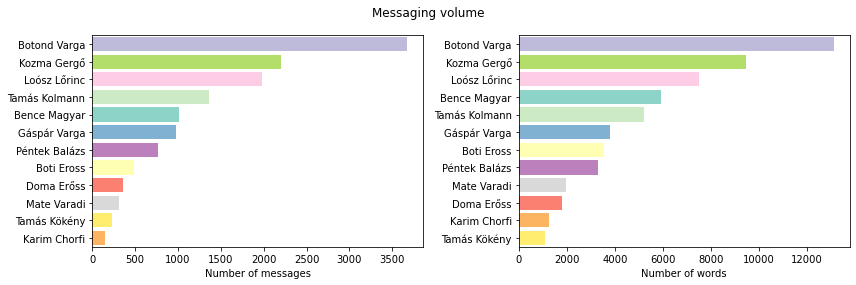

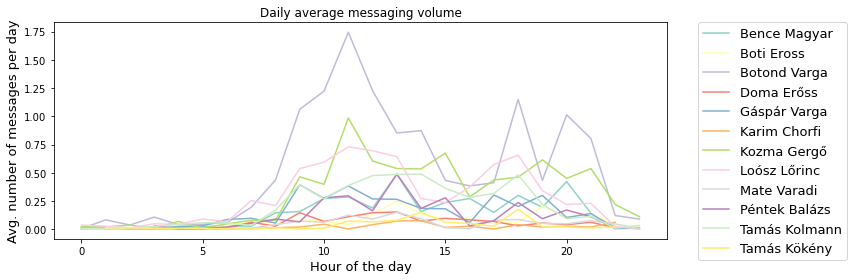

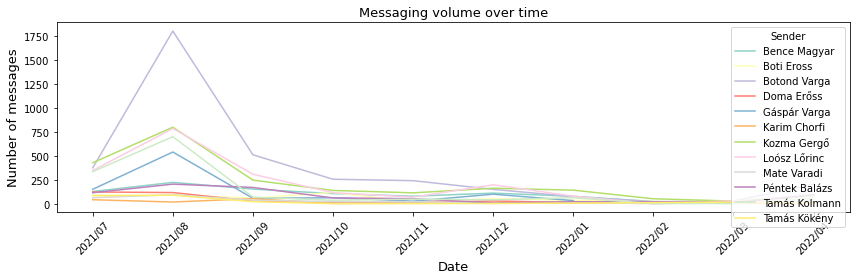

/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/matevaradi/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129436 (\N{PARROT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


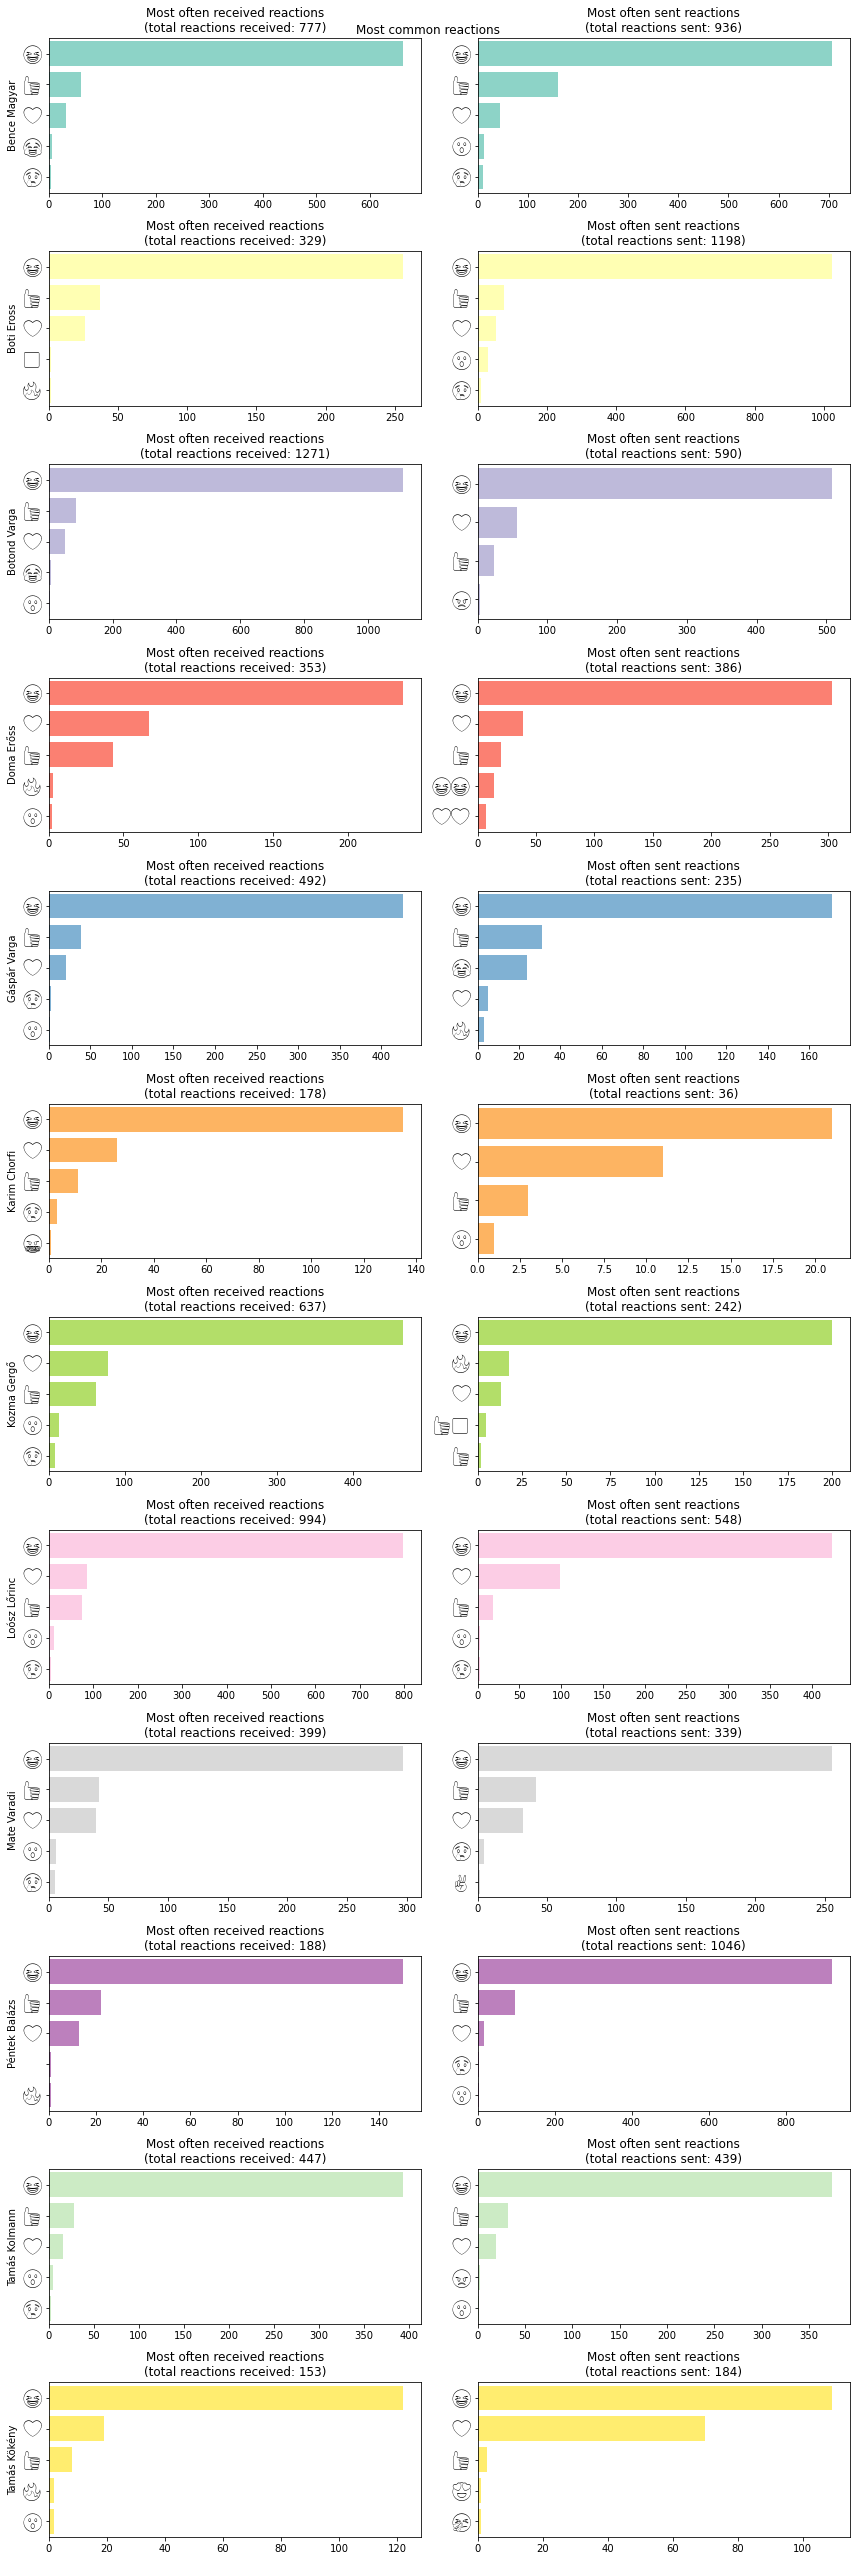

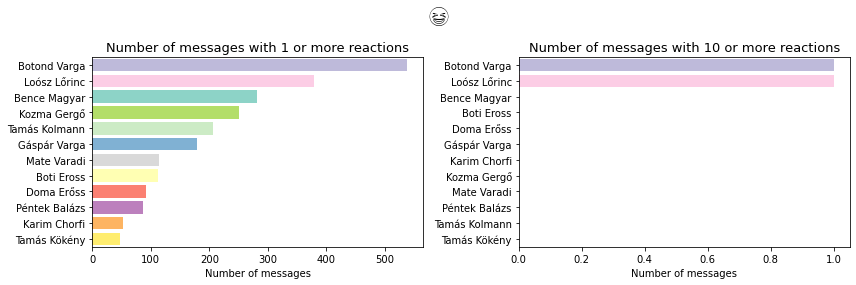

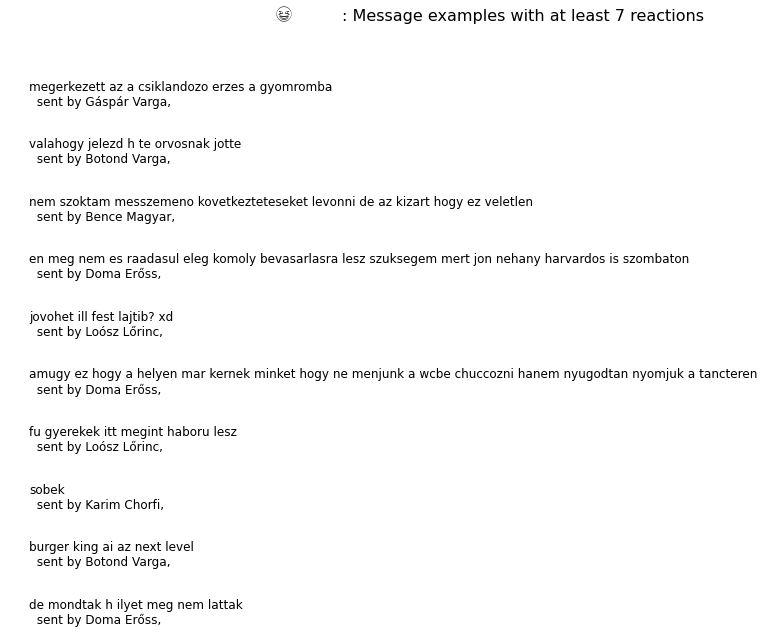

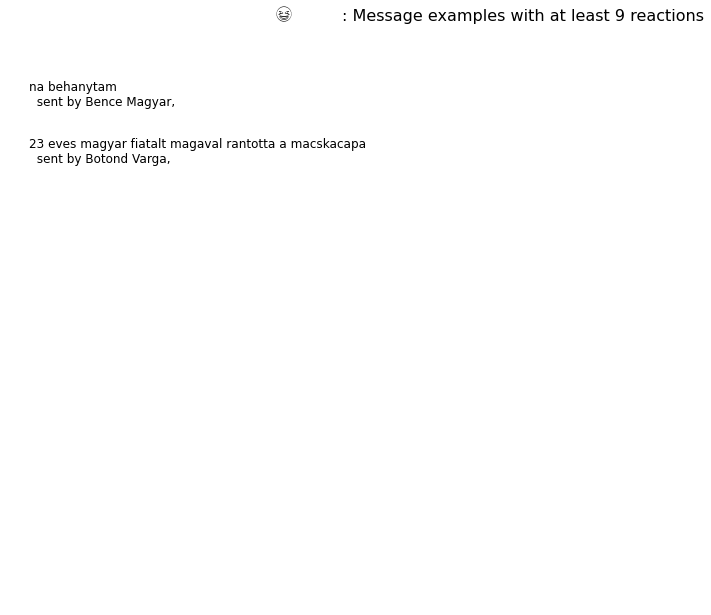

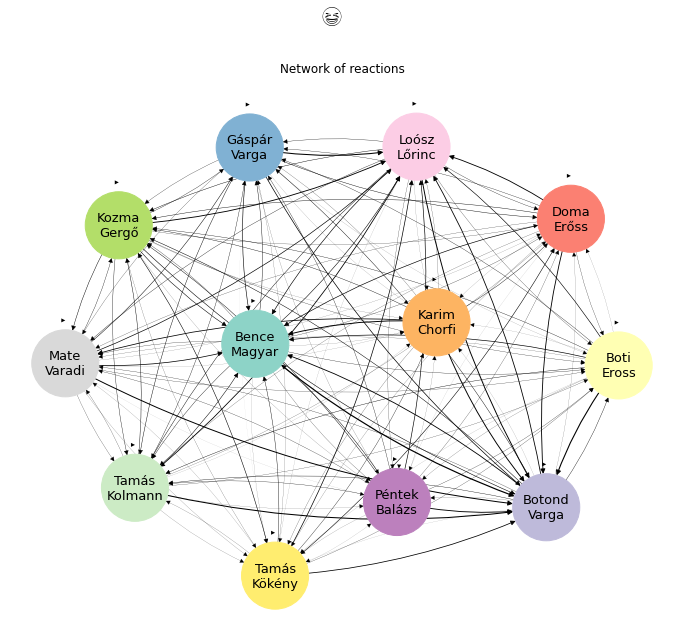

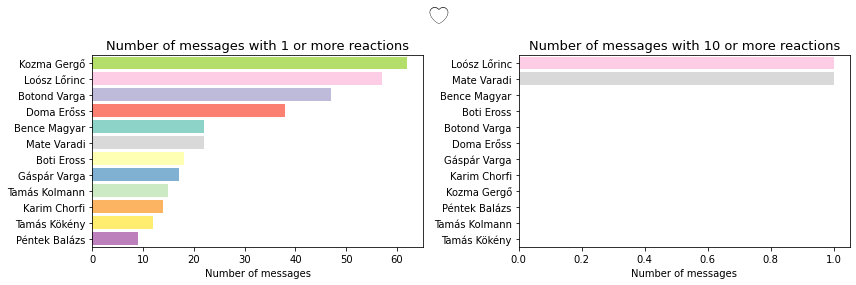

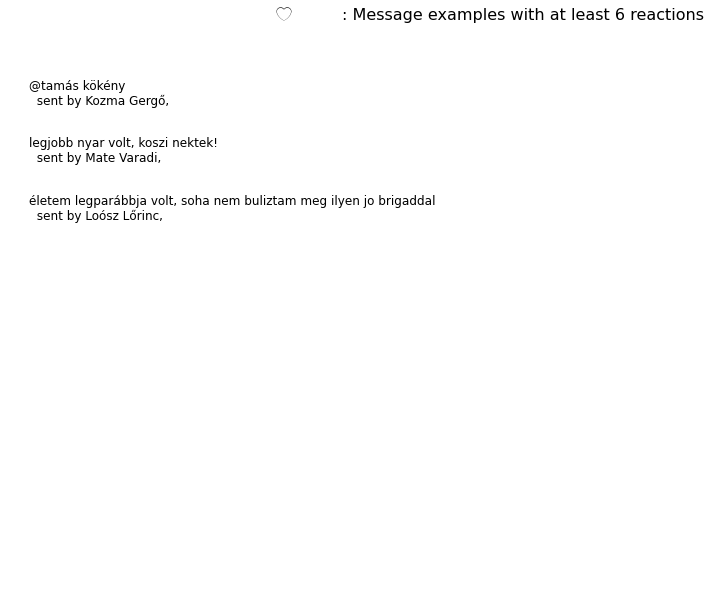

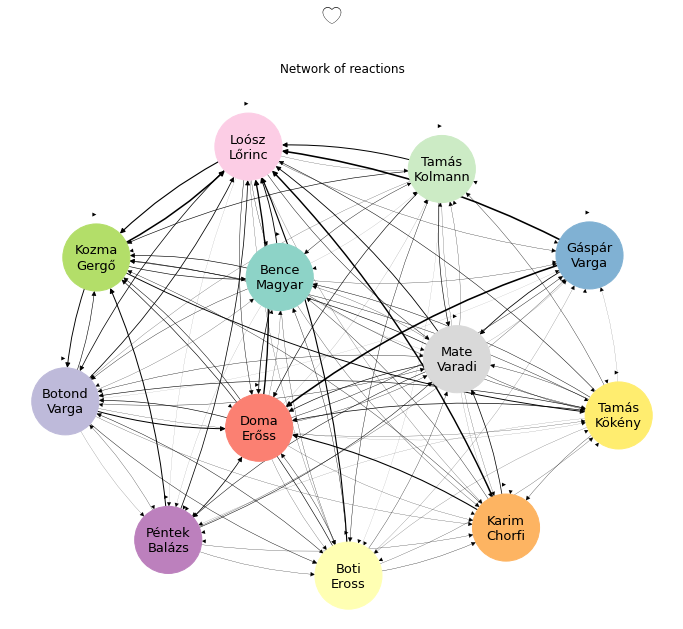

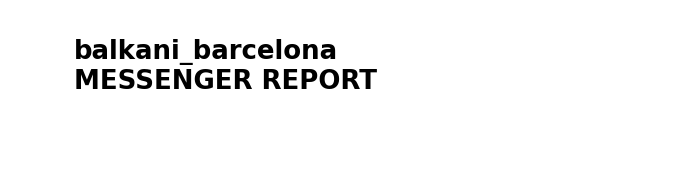

In [14]:
mr.pdf_report()